In [40]:
import pymysql
import pymongo
from pymongo import MongoClient
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn import datasets
import scipy.cluster.hierarchy as hac

import csv
import json
import pymysql

import pandas as pd
from datetime import datetime
# import seaborn as sb


In [86]:
db_query= "SELECT c.cus_fname AS FName, "\
"c.cus_lname AS LName, c.cus_city AS City, c.cus_dob AS DOB, p.pla_name AS Platform, "\
"it.itm_title AS Title, from_unixtime(i.inv_time) AS Date , NULL AS Decade, NULL AS Year, "\
"pr.prc_used AS used, pr.prc_new AS new, ii.ini_newused "\
"FROM rfu.invoices AS i "\
"JOIN rfu.customers AS c "\
" ON i.inv_customerID=c.cus_customerID "\
"JOIN rfu.invoice_items AS ii "\
" ON ii.ini_invoiceID = i.inv_invoiceID "\
"JOIN rfu.items AS it "\
" ON ii.ini_itemID = it.itm_itemID "\
"JOIN rfu.platforms AS p "\
" ON it.itm_platformID= p.pla_platformID "\
"JOIN rfu.prices AS pr "\
" ON it.itm_itemID = pr.prc_itemID;"
# 18 is new, 19 is used 


In [ ]:
#read query, export to csv

# conn = pymysql.connect(host='localhost', port=3306, user='root', 
#                        passwd='imkingoftheworld', db='rfu')

# cur = conn.cursor()

# cur.execute(db_query)

# print(cur.description)
# cols = [x[0] for x in cur.description]
# # for i in range(10):
# #     print cur[i]
# #     print
# # for row in cur:
# #     print(row)

# result = cur.fetchall()
# fp = open("temp.csv", "w")
# c = csv.writer(fp)
# c.writerow(["fname", "lname", "city", "dob", "platform", "title", "time"])
# c.writerows(result)

# fp.close()
# cur.close()
# conn.close()
# print "done with cursor"


In [9]:
# #import csv to mongodb
# client = MongoClient()
# db = client.rfu
# csvfile = open('temp.csv', 'r')
# jsonfile = open('temp.json', 'a')
# reader = csv.DictReader( csvfile )

# header = ["fname", "lname", "city", "dob", "platform", "title", "time"]

# output=[]
# for each in reader:
#     row={}
#     for field in header:
#         row[field]=each[field]
#     output.append(row)

# json.dump(output, jsonfile, indent=None, sort_keys=False , encoding="UTF-8")
# mongo_client=MongoClient() 
# db=mongo_client.october_mug_talk
# db.segment.drop()
# data=pd.read_csv('temp.json', error_bad_lines=0)
# df = pd.DataFrame(data)
# records = csv.DictReader(df)
# db.segment.insert(records)

In [10]:
# print client.database_names()

In [87]:
conn = pymysql.connect(host='localhost', port=3306, user='root', 
                       passwd='imkingoftheworld', db='rfu')
funun=pd.read_sql(db_query, conn, parse_dates = ["Date", "DOB"] )
print funun.sample(n=5)
# pandas.read_sql(sql, con, index_col=None, coerce_float=True, params=None, parse_dates=None, columns=None, chunksize=None)[source]

          FName                      LName        City        DOB  \
466408    David  Cunningham(Wrong Address)   Tremonton 1972-09-27   
55597   Harmony                      Davis       Logan 1980-02-14   
40070   Susanne                      Pella  Smithfield 2060-08-22   
8444        Val                     Porter                    NaT   
233810   Daniel                    Gregory  Providence 1993-10-21   

               Platform                                              Title  \
466408        X-Box 360  Final Fantasy XI(11) **DON'T ACCEPT!!! ONLINE ...   
55597   Gameboy Advance                       Midnight Club Street  Racing   
40070           Gameboy                               Game & Watch Gallery   
8444          Game Cube                                        Madden 2004   
233810    Playstation 2                                    Madden NFL 2005   

                      Date Decade  Year   used    new  ini_newused  
466408 2013-10-17 10:18:35   None  None  14.99 

In [88]:
print funun.sample(n=5)

          FName    LName     City        DOB        Platform  \
21868      Duey     Gill                 NaT       Game Cube   
481193     Kirk   Chaney  Preston 1991-03-15       X-Box 360   
150970      Liz  Chausse                 NaT     Playstation   
343161     Pete   Garcia                 NaT  Super Nintendo   
148466  Jenifer   Kangas    Logan 1976-04-05     Nintendo DS   

                                          Title                Date Decade  \
21868   Controller - Nintendo (Silver/Platinum) 2006-09-28 11:12:06   None   
481193                             Fable III(3) 2015-03-03 13:03:16   None   
150970                                 40 Winks 2015-07-08 16:45:50   None   
343161                           Gradius III(3) 2011-02-19 18:52:03   None   
148466                               Iron Man 2 2013-01-04 12:57:14   None   

        Year   used    new  ini_newused  
21868   None  24.99  39.99           19  
481193  None   9.99  19.99           19  
150970  None   7.99 

In [89]:
# funun['DOB']=pd.to_datetime(funun['DOB']), format='%d-%m-%Y %H:%M:%S'

# def is_in_range(x):
#    if x['Date'] > '28-02-2010 00:00:00' and x['Date'] < '31-08-2014 00:00:00':
#        return 1
#    else:
#        return 0

# data.groupby(df['date'].map(is_in_range))
print type(funun['DOB'][360484])
print dir(funun['DOB'][360484])
print funun['DOB'][360484].year
# print funun['DOB'][0]

def group_by_decade(x):

    if isinstance(x['DOB'], pd.tslib.Timestamp):
#         print x['DOB'].year
        return x['DOB'].year
    else:
        return None
    
def group_by_year(x):
    if isinstance(x['DOB'], pd.tslib.Timestamp):
#         print x['DOB'].year
        return x['DOB'].year
    else:
        return None
    
funun["Decade"] = funun.apply(group_by_decade, axis = 1)
funun["Year"] = funun.apply(group_by_decade, axis =1)

# funun["Year"] = funun.apply(lambda row: row.DOB.year if isinstance(x.DOB, pd.tslib.Timestamp) else 1900, axis=1)

<class 'pandas.tslib.Timestamp'>
['__add__', '__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pyx_vtable__', '__qualname__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__rsub__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__weakref__', '_date_repr', '_get_field', '_get_start_end_field', '_has_time_component', '_repr_base', '_round', '_time_repr', 'asm8', 'astimezone', 'ceil', 'combine', 'ctime', 'date', 'day', 'dayofweek', 'dayofyear', 'days_in_month', 'daysinmonth', 'dst', 'floor', 'freq', 'freqstr', 'fromordinal', 'fromtimestamp', 'hour', 'is_month_end', 'is_month_start', 'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start', 'isocalendar', 'isoformat', 'isoweekday', 'max', 'microsecond', 'min', 'minute', 'month', 'nanosecond', 'normalize', 'now', 'offset', 'quarter'

In [91]:
funun.sample(n=5)

,FName,LName,City,DOB,Platform,Title,Date,Decade,Year,used,new,ini_newused
427718,Kim,Rasmussen,,NaT,X-box,Controller - Yobo Black,2009-12-24 11:33:06,NaN,NaN,14.99,19.99,19
408659,Rio,Jensen,,NaT,X-box,Tom Clancy's Splinter Cell,2007-12-22 19:22:44,NaN,NaN,4.99,9.99,19
268109,Randi,Barr,Lewiston,NaT,Playstation 2,Pac-Man World 3,2012-04-20 15:17:20,NaN,NaN,17.99,19.99,19
145372,Jacklyn,schwartz,,NaT,Nintendo DS,Disney Fairies: Tinker Bell,2015-04-06 12:47:25,NaN,NaN,14.99,19.99,19
147262,Lisa,Wickham,Hyrum,1974-03-26,Nintendo DS,Paws & Claws-Pampered Pets,2013-03-15 16:21:40,1974.0,1974.0,14.99,19.99,19


In [75]:
platform=funun.groupby(["Platform", "Year"]).count()
# funun.plot(kind = 'scatter',"Date","")
print platform


                        FName  LName  City  DOB  Title  Date  Decade
Platform        Year                                                
Amiibo          1993.0      1      1     1    1      1     1       1
                1995.0      4      4     4    4      4     4       4
                2014.0      5      5     5    5      5     5       5
Board Games     1958.0      1      1     1    1      1     1       1
                1963.0      1      1     1    1      1     1       1
                1971.0      1      1     1    1      1     1       1
                1974.0      1      1     1    1      1     1       1
                1981.0      1      1     1    1      1     1       1
                1983.0      2      2     2    2      2     2       2
                1986.0      2      2     2    2      2     2       2
                1987.0      2      2     2    2      2     2       2
                1988.0      3      3     3    3      3     3       3
                1989.0      3     

In [119]:
# funun.plot.scatter('DOB','used')
filtered = funun.dropna()

p1 = filtered[filtered["Platform"] == "Super Nintendo"]
p1.sample(n=5)



,FName,LName,City,DOB,Platform,Title,Date,Decade,Year,used,new,ini_newused
355129,Cory,Seamons,Preston,1989-06-28,Super Nintendo,System-FC Twin (Super Nintendo/Nintendo) Black...,2007-12-29 12:45:04,1989.0,1989.0,39.99,49.99,18
353758,Cory,Jacobsen,lOGAN,1996-11-01,Super Nintendo,Legend of Zelda III(3): Link to the Past,2016-05-17 11:58:14,1996.0,1996.0,44.99,0.00,19
348368,Aleigh,Greene,Brigham City,1986-03-18,Super Nintendo,Street Fighter II (2),2009-03-26 18:24:31,1986.0,1986.0,14.99,0.00,19
351572,Grant,Bushman,logan,1978-10-11,Super Nintendo,Super Star Wars,2005-06-08 14:38:59,1978.0,1978.0,6.99,0.00,19
355901,Brandon,Sandoval,Logan,1980-11-13,Super Nintendo,System - FC3 Plus (SNES/Genesis/NES)(Charcoal/...,2009-05-02 15:19:36,1980.0,1980.0,39.99,59.99,18


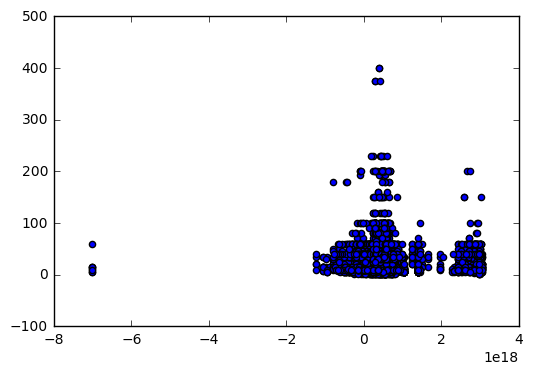

In [125]:
# plt.scatter(filtered["DOB"], filtered["used"])
plt.scatter(p1["DOB"].astype(np.int64), p1["used"])

In [5]:
xnorm = data
plt.scatter(x_norm[:, 0], x_norm[:, 1])


C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


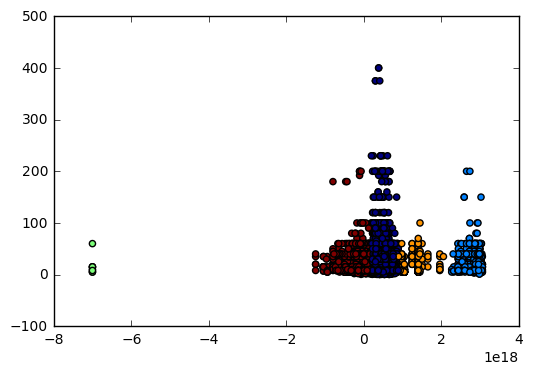

In [134]:

tester_norm=KMeans(n_clusters=5)
p1["DOB"] =p1["DOB"].astype(np.int64)
tester_norm.fit(p1[["DOB", "used"]])
labels_norm = tester_norm.labels_
plt.scatter(p1["DOB"].astype(np.int64), p1["used"], c=labels_norm.astype(np.float))